# Aktuelt regnskab

### 1. Import the relevant Gorgi methods:

In [1]:
import gorgireader
import gorgimessages
import opslaget

Methods at our disposal:

+ **`getWorkbook()`** from `gorgireader` returns a pandas dataframe
+ **`createAllMessages(df, month, year, dates, deadline, who = range(1, 24))`** from `gorgimessages` prints all (or selected) messages
+ **`createOpslagetEN(month, year, dates)`** or **`createOpslagetDK(month, year, dates)`** from `opslaget` create a facebook posting

### 2. Set values:

In [2]:
# only define path when different than 
# D:/Dropbox/Egmont/Regnskab/Aktuelt Regnskab/gangregnskab_egmontgl8.xlsx
df = gorgireader.getWorkbook()
month = "december"
year = "2017"
# dates format: "2/7/2017-2/8/2017", or however you would like it to look
dates = "04/12/2017-07/01/2018"
deadline = "21/01"

### 3. Create the facebook posting:

In [3]:
opslag = opslaget.createOpslagetDK(month, year, dates)
# or, in English:
# opslag = opslaget.createOpslagetEN(month, year, dates)

GANGREGNSKAB december 2017 (04/12/2017-07/01/2018)

Hej venner,

det nye gangregnskab er oppe!

Tjek jeres ny saldo i den grøn kolonne. Hvis saldoen er under 300 kr. så skal i overføre til gangkontoen i løbet af to uger (ellers ryger der 5 procent strafrente). Beløbet i skal overføre står i kolonnen helt til højre.

Mit freundlichen Grüßen
/801.

Vores gangkonto: Reg. 2104 Kto. 4391 845 196 (kan også findes i informationen af facebook gruppen).


### 4. Create the messages:

In [4]:
beskeder = gorgimessages.createAllMessages(df, month, year, dates, deadline)

Hej Alex,

regnskabet for december 2017 (04/12/2017-07/01/2018) er oppe i facebook gruppen.

Din nye saldo er +552 kr.

Du kan se detaljerne på de forskellige screenshots i gruppen.

Skriv til mig hvis jeg har glemt et eller andet, og hvis du har spørgsmål!

/801 Alex

Gangkonto: Reg. 2104 Kto. 4391 845 196

****

Hej Sofie,

regnskabet for december 2017 (04/12/2017-07/01/2018) er oppe i facebook gruppen.

Din nye saldo er +860 kr.

Du kan se detaljerne på de forskellige screenshots i gruppen.

Skriv til mig hvis jeg har glemt et eller andet, og hvis du har spørgsmål!

/801 Alex

Gangkonto: Reg. 2104 Kto. 4391 845 196

****

Hej Amalie,

regnskabet for december 2017 (04/12/2017-07/01/2018) er oppe i facebook gruppen.

Din nye saldo er +682 kr.

Du kan se detaljerne på de forskellige screenshots i gruppen.

Skriv til mig hvis jeg har glemt et eller andet, og hvis du har spørgsmål!

/801 Alex

Gangkonto: Reg. 2104 Kto. 4391 845 196

****

Hej Oskar,

regnskabet for december 2017 (04/12/2

### 5. Create the plot:

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [6]:
regnskab = gorgireader.getWorkbook()
gorgimessages.whichMessage(regnskab)

,nummer,name,gammel_saldo,ind,forbrug,ny_saldo,transfer,msg_type
1,801,Alex,478.233,0,73.6909,551.924,NaN,1
2,802,Sofie,814.313,0,45.6909,860.004,NaN,1
3,803,Amalie,668.036,0,13.8209,681.857,NaN,1
4,804,Oskar,271.301,100,84.4909,455.792,NaN,1
5,805,Jakob,2557.28,0,3.49091,2560.77,NaN,1
6,806,Mads,-102.929,403,62.4909,362.562,NaN,1
7,807,Morten,1361.13,0,-503.599,857.535,NaN,1
8,808,Celine,-150.725,0,5.09467,-145.63,445.63,-1
9,809,Henrik,-568.018,868,-312.989,-13.0066,313.007,-1
10,810,Astrid,-287.785,0,-50.7484,-338.534,638.534,-1


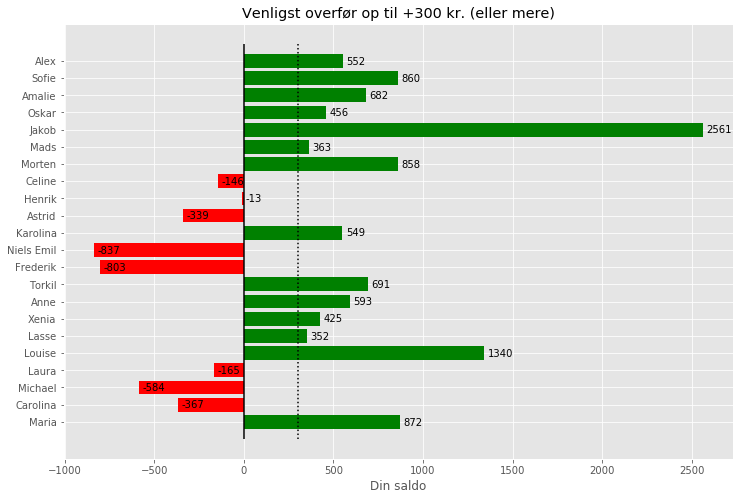

In [7]:
beboertal = 22

fig, ax = plt.subplots(figsize = (12, 8))

ax.barh(range(1, beboertal + 1), regnskab["ny_saldo"], align = 'center', 
        color = regnskab.msg_type.map({-1: "r", 0: "0.75", 1: "g"}), ecolor = 'black')
#plt.axis([-2050, 2050, -1, 25])
ax.set_yticks(range(1, beboertal + 1))
ax.set_yticklabels(regnskab["name"])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Din saldo')
plt.vlines(0, ymin = 0, ymax = beboertal + 1, colors = 'k', linestyles = '-')
plt.vlines(300, ymin = 0, ymax = beboertal + 1, colors = 'k', linestyles = ':')
ax.set_title('Venligst overfør op til +300 kr. (eller mere)')

for i, v in enumerate(regnskab["ny_saldo"]):
    ax.text(v + 20, i + 1.2, str(round(v)), color = "k")

plt.show()